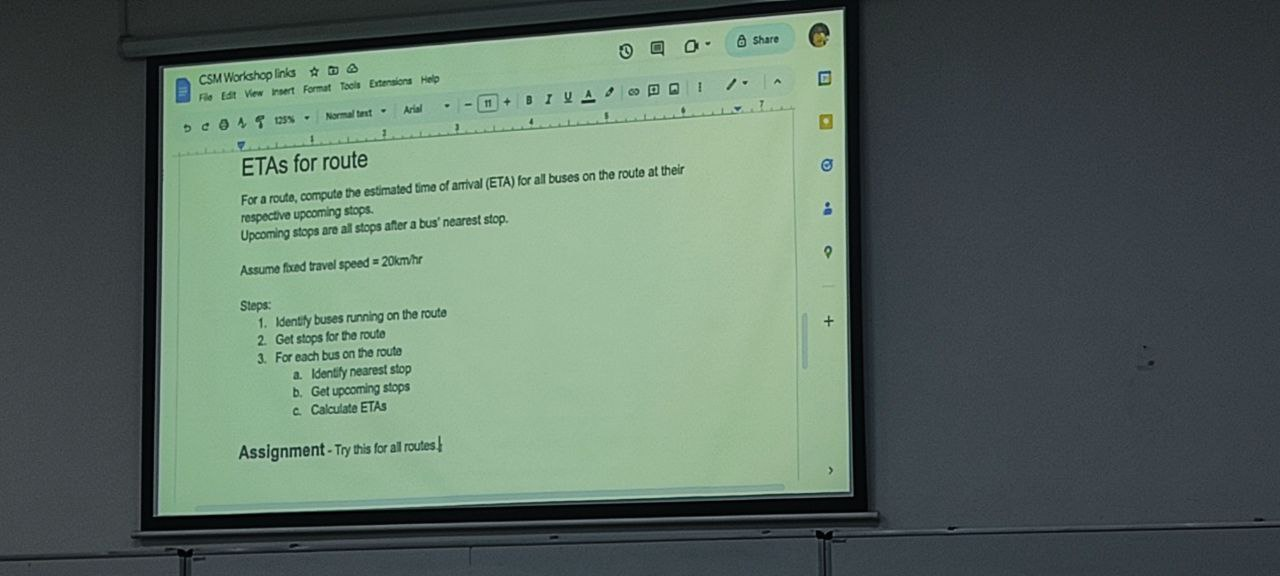

In [1]:
# Import the "drive" module from the "google.colab" package
from google.colab import drive

# Mount the Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/6th Sem/IIIT Workshop'

/content/drive/.shortcut-targets-by-id/1hG4Q2pHGCCR7N5XU9-PdxrgxqiocuoBG/6th Sem/IIIT Workshop


In [3]:
import subprocess

# Install gtfs-realtime-bindings package
subprocess.call(['pip', 'install', 'gtfs-realtime-bindings==0.0.6'])

# Install ipyleaflet package
subprocess.call(['pip', 'install', 'ipyleaflet'])

0

In [4]:
import pandas as pd  # A library for reading and manipulating data in Python
import folium  # A library for creating interactive maps with Python
import random  # A library for generating random numbers and selecting random samples from data
from geopy.distance import distance  # A library for computing geospatial distances between two points
import requests  # A library for making HTTP requests in Python
from google.transit import gtfs_realtime_pb2  # A library for working with real-time General Transit Feed Specification (GTFS) data
from collections import defaultdict  # A built-in Python data structure that provides default values for missing keys in a dictionary


In [5]:
# Importing necessary libraries
import pandas as pd

# Setting the directory for GTFS files
gtfs_files_dir = "/content/drive/MyDrive/6th Sem/IIIT Workshop/GTFS/"

# Reading the GTFS files into pandas dataframes

# routes.txt - contains information about transit routes
routes = pd.read_csv(gtfs_files_dir + "routes.txt")

# trips.txt - contains information about trips, i.e., a sequence of stops that occurs at specific times on a given route
trips = pd.read_csv(gtfs_files_dir + "trips.txt")

# stops.txt - contains information about transit stops
stops = pd.read_csv(gtfs_files_dir + "stops.txt")

# stop_times.txt - contains information about the times that a vehicle arrives at and departs from each stop on a trip.
stop_times = pd.read_csv(gtfs_files_dir + "stop_times.txt")

In [6]:
# Printing the first few rows of each dataframe
print(f"""
routes:
{routes.head()}

trips:
{trips.head()}

stops:
{stops.head()}

stop_times:
{stop_times.head()}
""")


routes:
  agency_id  route_id route_long_name  route_short_name  route_type
0     DIMTS         0     764MSTLDOWN               NaN           3
1     DIMTS         1      102STLDOWN               NaN           3
2     DIMTS         2      819STLDOWN               NaN           3
3     DIMTS         3           138UP               NaN           3
4     DIMTS         4      978STLDOWN               NaN           3

trips:
   route_id  service_id  trip_id  shape_id
0         0           1  0_06_00       NaN
1         0           1  0_06_10       NaN
2         0           1  0_06_20       NaN
3         0           1  0_06_30       NaN
4         0           1  0_06_40       NaN

stops:
   stop_id stop_code                   stop_name   stop_lat   stop_lon  \
0        0    DC4539             Narela Terminal  28.852004  77.088059   
1        1    DC4540       Police Station Narela  28.853366  77.088535   
2        2    DC4541          Safiyabad Crossing  28.855266  77.089730   
3        3   

In [7]:
# Merging dataframes to create a single dataframe with all necessary information

# Merging routes and trips dataframes on the "route_id" column
merged_df = pd.merge(routes, trips, on=f"route_id")

# Merging the stop_times dataframe with the merged routes/trips dataframe on the "trip_id" column
merged_df = pd.merge(merged_df, stop_times, on=f"trip_id")

# Merging the stops dataframe with the previously merged dataframe on the "stop_id" column
merged_df = pd.merge(merged_df, stops, on=f"stop_id")

merged_df

,agency_id,route_id,route_long_name,route_short_name,route_type,service_id,trip_id,shape_id,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_name,stop_lat,stop_lon,zone_id
0,DIMTS,0,764MSTLDOWN,NaN,3,1,0_06_00,NaN,06:00:00,06:00:00,3127,0,DC4183,Dwarka Sec-21 Crossing,28.55381,77.058640,3127
1,DIMTS,0,764MSTLDOWN,NaN,3,1,0_06_10,NaN,06:10:00,06:10:00,3127,0,DC4183,Dwarka Sec-21 Crossing,28.55381,77.058640,3127
2,DIMTS,0,764MSTLDOWN,NaN,3,1,0_06_20,NaN,06:20:00,06:20:00,3127,0,DC4183,Dwarka Sec-21 Crossing,28.55381,77.058640,3127
3,DIMTS,0,764MSTLDOWN,NaN,3,1,0_06_30,NaN,06:30:00,06:30:00,3127,0,DC4183,Dwarka Sec-21 Crossing,28.55381,77.058640,3127
4,DIMTS,0,764MSTLDOWN,NaN,3,1,0_06_40,NaN,06:40:00,06:40:00,3127,0,DC4183,Dwarka Sec-21 Crossing,28.55381,77.058640,3127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611032,DTC,6001,946DOWN,NaN,3,1,6001_14_18,NaN,16:31:30,16:31:30,11691,62,DC3775,Jhilmil Crossing / Dilshad Garden GT Road,28.67640,77.318217,11691
3611033,DTC,6001,946DOWN,NaN,3,1,6001_05_30,NaN,07:43:30,07:43:30,11691,62,DC3775,Jhilmil Crossing / Dilshad Garden GT Road,28.67640,77.318217,11691
3611034,DTC,6001,946DOWN,NaN,3,1,6001_15_54,NaN,18:07:30,18:07:30,11691,62,DC3775,Jhilmil Crossing / Dilshad Garden GT Road,28.67640,77.318217,11691
3611035,DTC,6001,946DOWN,NaN,3,1,6001_07_06,NaN,09:19:30,09:19:30,11691,62,DC3775,Jhilmil Crossing / Dilshad Garden GT Road,28.67640,77.318217,11691


In [8]:
per_route = 5555  # Default route ID to use if none is provided by the user
per_route = int(input("Enter route id: "))  # Prompt the user to enter a route ID and convert it to an integer
all_route_details = merged_df[merged_df['route_id']==per_route]
print(f"Name of the route - {all_route_details['route_long_name'].unique()}")

Enter route id: 5555
Name of the route - ['194DOWN']


In [9]:
all_trips = all_route_details['trip_id'].reset_index(drop=True).unique()
all_trips

array(['5555_11_38', '5555_11_12', '5555_07_44', '5555_08_10'],
      dtype=object)

In [10]:



# for i in range(len(all_trips)):
#   single_trip_id = all_trips[i]
#   arr_time = (all_route_details['arrival_time'].loc[all_route_details['trip_id'] == all_trips[i]]).reset_index(drop=True).unique()

# arr_time[0]

In [11]:
class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value
 
 
# Main Function
df = my_dictionary()

for i in range(len(all_trips)):
  f_arr_time = merged_df[merged_df['trip_id']==all_trips[i]].sort_values('stop_sequence')['arrival_time'].reset_index(drop=True)[0]
  l_arr_time = merged_df[merged_df['trip_id']==all_trips[i]].sort_values('stop_sequence')['arrival_time'].reset_index(drop=True)[len(merged_df[merged_df['trip_id']==all_trips[i]].sort_values('stop_sequence'))-1]
  df.add(all_trips[i], [f_arr_time, l_arr_time])
df


# print(len(all_trips['stop_sequence']))

{'5555_11_38': ['11:38:00', '13:10:26'],
 '5555_11_12': ['11:12:00', '12:44:26'],
 '5555_07_44': ['07:44:00', '09:16:26'],
 '5555_08_10': ['08:10:00', '09:42:26']}

In [12]:
merged_df[merged_df['trip_id']==all_trips[3]].sort_values('stop_sequence')

,agency_id,route_id,route_long_name,route_short_name,route_type,service_id,trip_id,shape_id,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_name,stop_lat,stop_lon,zone_id
2670757,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:10:00,08:10:00,13861,0,NaN,Bakuli Temple,28.814227,77.140515,13861
3501580,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:11:55,08:11:55,12682,1,DC4964,Bakauli Village,28.811949,77.136329,12682
3501934,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:16:47,08:16:47,10545,2,DC4829,Pwd Office,28.801200,77.138967,10545
2101664,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:18:45,08:18:45,11097,3,DC4807,Alipur Village GT Road,28.796783,77.139433,11097
2100935,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:20:22,08:20:22,11096,4,DC4806,Bdo Office,28.793150,77.139833,11096
3502400,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:25:19,08:25:19,10547,5,DC4834,Budhpur GT Road,28.782107,77.141601,10547
3502902,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:27:33,08:27:33,10548,6,DC4835,Jain Mandir,28.777150,77.142633,10548
3503426,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:28:54,08:28:54,10549,7,DC4836,Nangli Puna,28.774167,77.143267,10549
3503957,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:33:08,08:33:08,10550,8,DC4837,Gurudwara Siraspur GT Road,28.764956,77.146126,10550
3504508,DTC,5555,194DOWN,NaN,3,1,5555_08_10,NaN,08:36:12,08:36:12,10022,9,DC3605,Swaroop Nagar GT Road,28.758318,77.148305,10022


# Step 1 -> Identify Buses running on route {per_route}

In [20]:
from datetime import datetime

# Get all buses on a particular route
all_buses = merged_df[merged_df['route_id'] == per_route]

# Sort the buses by arrival time
all_buses = all_buses.sort_values('stop_sequence')

# Get unique trip IDs
all_trips_id = all_buses['trip_id'].unique()

# Initialize variables for counting buses and repeat buses
count = 0
rep_bus = 0

# Initialize empty lists to store arrival and departure times
time1 = []
time2 = []

# Get the first and last arrival time for each trip
for i in range(len(all_trips_id)):
  all_busess = all_buses[all_buses['trip_id']==all_trips_id[i]]
  time1.append(all_busess['arrival_time'].reset_index(drop=True)[0])
  time2.append(all_busess['arrival_time'].reset_index(drop=True)[len(all_busess['arrival_time'])-1])

# Define the bus times
trip_id = all_trips_id
arrival_time = time1
departure_time = time2

# Convert the times to minutes since midnight
arrival_minutes = [int(t.split(':')[0]) * 60 + int(t.split(':')[1]) for t in arrival_time]
departure_minutes = [int(t.split(':')[0]) * 60 + int(t.split(':')[1]) for t in departure_time]

# Sort the points by arrival time
points = sorted(zip(trip_id, arrival_minutes, departure_minutes), key=lambda x: x[1])

# Initialize the bus schedule
bus_schedule = []

# Loop through the points and assign them to buses
for point in points:
    assigned = False
    # Try to assign the point to an existing bus
    for i, bus in enumerate(bus_schedule):
        if bus[-1][2] <= point[1]:
            # If the bus can make it to the point before its arrival time, assign the point to the bus
            bus_schedule[i].append(point)
            assigned = True
            break
    # If the point could not be assigned to an existing bus, add a new bus
    if not assigned:
        bus_schedule.append([point])

# Print the number of buses needed
print(len(bus_schedule))


print(f'in the route {per_route} have atleast {len(bus_schedule)} buses')
print(f'in the route {per_route} have atmax {len(all_trips_id)} buses')

2
in the route 5555 have atleast 2 buses
in the route 5555 have atmax 4 buses


#Step 2 -> Get stops for the route

In [21]:
# Get unique stop IDs for the route
all_stops_route = all_buses['stop_id'].unique()

# Print all stops and total number of stops for the route
print(f"""
All stops for the route {per_route} 
{all_buses['stop_id'].unique()}

Total Stops on route {per_route} - {len(all_stops_route)}""")


All stops for the route 5555 
[13861 12682 10545 11097 11096 10547 10548 10549 10550 10022 10023 10024
 14739 10026 13707 10228 13925 10032 10033 10034 10035 14705 10036 10037
 10038 10039 13766 13836 14732 10041 10042 10043 10867 10045 10046 10047
 10101 10102 10702 14761 10339]

Total Stops on route 5555 - 41


In [22]:
import folium

def plot_points_on_map(map_obj, stops_df):
    """
    Plots points on a folium map based on coordinates provided in a pandas dataframe.

    Args:
    - map_obj: a folium map object where points will be plotted
    - stops_df: a pandas dataframe containing stop information (latitude, longitude, stop name)

    Returns:
    None
    """
    
    # Iterate through each row of the stops dataframe.
    for index, row in stops_df.iterrows():
        # Get the latitude and longitude coordinates for the current row.
        coord = (row['stop_lat'], row['stop_lon'])
        # Get the name of the stop for the current row.
        stop_name = row['stop_name']
        # Choose a random color from the colormap for the marker.
        marker_color = 'black'
        # Create a circle marker at the coordinate location with the stop name as a tooltip.
        folium.CircleMarker(location=coord,
                            radius=3,
                            fill=True,
                            tooltip=stop_name,
                            color=marker_color,
                            fill_opacity=0.7).add_to(map_obj)
    # Print a message to indicate that the points have been plotted on the map.
    print(f"Plotted {stops_df.shape[0]} points on the map.")

In [23]:
stops_map = folium.Map(location=[28.628833, 77.206805], zoom_start=10)
plot_points_on_map(stops_map, all_buses)

# Display the map in the Jupyter notebook.
stops_map

Plotted 164 points on the map.


# Step 3 -> For each bus on the route

## 3.1 -> Identify nearest stop

for accessing the each bus we use trip_id <br>
assuming trip_id is unique for the each bus <br>
<br>
To find the nearest point to the bus we use the time - current time and the time from which bus leave from previous stop ['departure_time'] and the bus reached to next stop ['arrival_time']
<br>
We will check which one is more close to current time and find the stop_id of that stop which is closer to bus
<br>
<br>
first we are checking <br> what is the next stop of the bus using current time and the arrival time of next stop of the bus, <br>from the next stop we use the coordinates to check which stop is closer to the bus

In [24]:
# Set the current time as a string.
curr_time_str = "19:24:30"

# Prompt the user to enter the current time as a string and store it in the curr_time_str variable.
curr_time_str = input("Enter Current time: ")

Enter Current time: 11:25:00


In [25]:
# for i in range(len(all_trips_id)):
#   trip_id_de = all_buses[all_buses['trip_id']==all_trips_id[i]].sort_value('stop_sequence')
#   if curr_time_str > trip_id_de['arrival_time'][0]:
#     if curr_time_str < trip_id_de['departure_time'][len(trip_id_de['trip_id'])-1]:
#       print(i)

# print(trip_id_de['trip_id'].unique())

In [26]:
# Importing datetime module to work with time values
from datetime import datetime

# Creating empty dictionaries to store bus stop information and ETA values
etadic = {}
upcstop = {}
alldic = {}

# Looping through all the trips in the data
for i in range(len(all_trips_id)):
    # Getting the ID of the current trip
    single_trip_id = all_trips_id[i]

    # Getting all the stops for the current trip
    all_stops_single_bus_route = all_buses[all_buses['trip_id'] == single_trip_id]

    # Checking where the bus currently is and what the previous and next stops are
    for j in range(1, len(all_stops_route)):
        pre_dep_time = all_stops_single_bus_route['departure_time'].reset_index(drop=True)[j-1]
        curr_time = curr_time_str
        nxt_arr_time = all_stops_single_bus_route['arrival_time'].reset_index(drop=True)[j]

        # Checking if the current time is between the previous and next stop times
        if pre_dep_time < curr_time_str and curr_time_str < nxt_arr_time:
            pre_stop = all_stops_route[j-1]
            next_stop = all_stops_route[j]

            # Converting the time values to datetime objects to perform calculations
            pre_dep_time = datetime.strptime(f"{pre_dep_time}", "%H:%M:%S")
            curr_time = datetime.strptime(f"{curr_time}", "%H:%M:%S")
            curr_time_r = curr_time
            nxt_arr_time = datetime.strptime(f"{nxt_arr_time}", "%H:%M:%S")

            # Calculating the distance from the previous stop to the bus's current location
            dis_pre_stop = (curr_time - pre_dep_time).seconds * ((20*1000)/3600)  # d = t * s, where s = 20 m/s
            print(curr_time - pre_dep_time)
            print(type(curr_time))
            print(type(curr_time - pre_dep_time))

            # Calculating the distance from the bus's current location to the next stop
            nxt_arr_stop = (nxt_arr_time - curr_time).seconds * ((20*1000)/3600)  # d = t * s, where s = 20 m/s

            # Checking which stop is closer to the bus's current location and printing its details
            if dis_pre_stop < nxt_arr_stop:
                print(f"""For the Bus trip_id {single_trip_id} 
                      {all_stops_route[j-1]} stop is closest point 
                      Name of the Stop - {(all_buses['stop_name'].loc[all_buses['stop_id']==all_stops_route[j-1]]).unique()}
                      and coordinates points  
                      stop_lat - {(all_buses['stop_lat'].loc[all_buses['stop_id']==all_stops_route[j-1]]).unique()} 
                      stop_lon - {(all_buses['stop_lon'].loc[all_buses['stop_id']==all_stops_route[j-1]]).unique()}
                      Time - {pre_dep_time}

                      if
                      """)
            else:
                print(f"""For the Bus trip_id {single_trip_id} 
                      {all_stops_route[j]} stop is closest point 
                      Name of the Stop - {(all_buses['stop_name'].loc[all_buses['stop_id']==all_stops_route[j]]).unique()}
                      and coordinates points  
                      stop_lat - {(all_buses['stop_lat'].loc[all_buses['stop_id']==all_stops_route[j]]).unique()} 
                      stop_lon - {(all_buses['stop_lon'].loc[all_buses['stop_id']==all_stops_route[j]]).unique()}
                      Time - {nxt_arr_time}
                      
                      else
                      """)
                
            # print(f'upcoming stops - {all_stops_route[j:]}')
            ETA = nxt_arr_stop/((20*1000)/3600)
            import datetime
            ETA = curr_time_r+datetime.timedelta(seconds=ETA)
            upcstop.update({f"{single_trip_id}": f"{all_stops_route[j:]}"})
            etadic.update({f"{single_trip_id}": f"{ETA}"})

        
# print(alldic)
print(upcstop)
print(etadic)
print("Rest all busses are not in the route at current time")


0:02:38
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
For the Bus trip_id 5555_11_12 
                      10547 stop is closest point 
                      Name of the Stop - ['Budhpur GT Road']
                      and coordinates points  
                      stop_lat - [28.782107] 
                      stop_lon - [77.141601]
                      Time - 1900-01-01 11:27:19
                      
                      else
                      
{'5555_11_12': '[10547 10548 10549 10550 10022 10023 10024 14739 10026 13707 10228 13925\n 10032 10033 10034 10035 14705 10036 10037 10038 10039 13766 13836 14732\n 10041 10042 10043 10867 10045 10046 10047 10101 10102 10702 14761 10339]'}
{'5555_11_12': '1900-01-01 11:27:19'}
Rest all busses are not in the route at current time


## 3.2 -> Get upcoming stops


In [32]:
print(f"""
Upcoming Stops - 
{upcstop}
""")


Upcoming Stops - 
{'5555_11_12': '[10547 10548 10549 10550 10022 10023 10024 14739 10026 13707 10228 13925\n 10032 10033 10034 10035 14705 10036 10037 10038 10039 13766 13836 14732\n 10041 10042 10043 10867 10045 10046 10047 10101 10102 10702 14761 10339]'}



3.3 -> EtA Time for each bud

In [33]:
print(f"""
Estimate Time - {etadic}
""")


Estimate Time - {'5555_11_12': '1900-01-01 11:27:19'}

